# Stochastic Gradient Descent


In [64]:
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [65]:
# Generate sample data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
# Initialize SGDRegressor
sgd_regressor = SGDRegressor(learning_rate='constant', eta0=0.01, max_iter=100, random_state=42)

In [67]:
# Perform SGD on the training data
sgd_regressor.fit(X_train, y_train.ravel())

# Make predictions on the test set
y_pred = sgd_regressor.predict(X_test)

Mean Squared Error: 0.6575521625642928


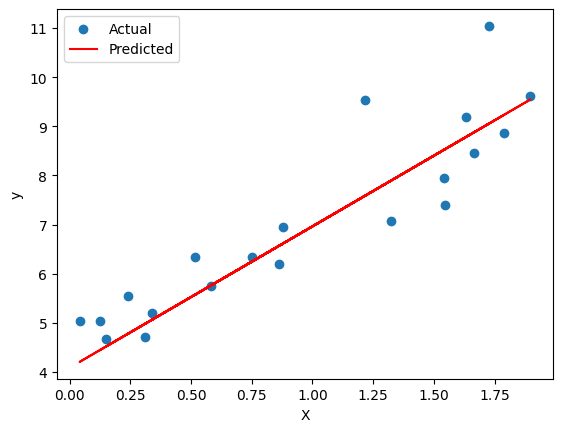

In [68]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot the data and the linear regression line
plt.scatter(X_test, y_test, label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

# Mini-batch Gradient Descent

Mean Squared Error: 0.6518721674606367


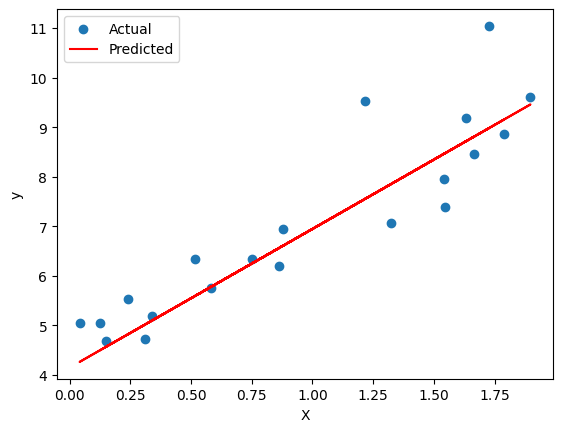

In [69]:
# Perform Mini-Batch SGD on the training data
batch_size = 10
for epoch in range(100):
    for i in range(0, len(X_train), batch_size):
        X_batch = X_train[i:i + batch_size]
        y_batch = y_train[i:i + batch_size]
        sgd_regressor.partial_fit(X_batch, y_batch.ravel())

# Make predictions on the test set
y_pred = sgd_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot the data and the linear regression line
plt.scatter(X_test, y_test, label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


# Adam

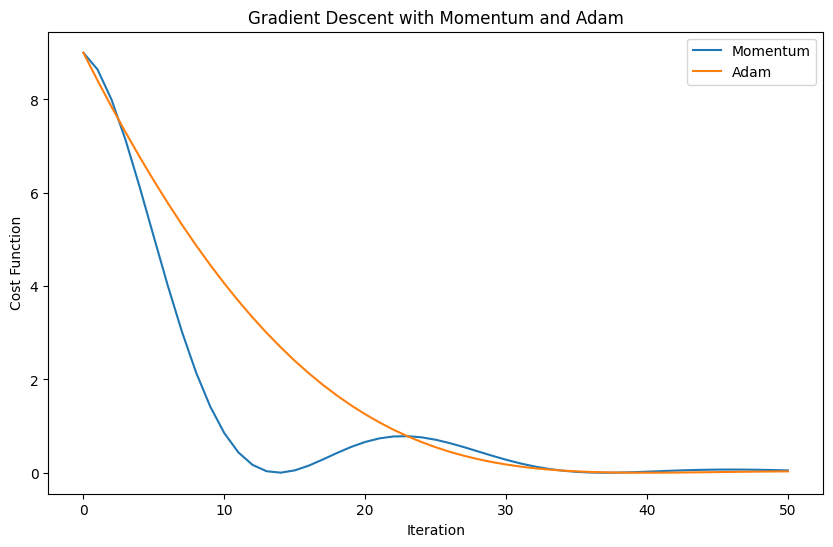

In [70]:
def cost_function(x):
    return x**2

def gradient(x):
    return 2 * x

def gradient_descent_with_momentum(initial_x, learning_rate, beta, num_iterations):
    x = initial_x
    v = 0  # Initial momentum term

    trajectory = [x]

    for _ in range(num_iterations):
        grad = gradient(x)
        v = beta * v + (1 - beta) * grad
        x = x - learning_rate * v
        trajectory.append(x)

    return np.array(trajectory)

def adam_optimizer(initial_x, learning_rate, beta1, beta2, epsilon, num_iterations):
    x = initial_x
    m = 0  # Initialize first moment vector
    v = 0  # Initialize second moment vector
    t = 0  # Initialize time step

    trajectory = [x]

    for _ in range(num_iterations):
        t += 1
        grad = gradient(x)
        m = beta1 * m + (1 - beta1) * grad
        v = beta2 * v + (1 - beta2) * grad**2
        m_hat = m / (1 - beta1**t)
        v_hat = v / (1 - beta2**t)
        x = x - learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)
        trajectory.append(x)

    return np.array(trajectory)

# Parameters
initial_x = 3.0
learning_rate = 0.1
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8
num_iterations = 50

# Run gradient descent with momentum
trajectory_with_momentum = gradient_descent_with_momentum(initial_x, learning_rate, beta1, num_iterations)

# Run Adam optimizer for comparison
trajectory_adam = adam_optimizer(initial_x, learning_rate, beta1, beta2, epsilon, num_iterations)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(np.arange(num_iterations + 1), cost_function(trajectory_with_momentum), label='Momentum')
plt.plot(np.arange(num_iterations + 1), cost_function(trajectory_adam), label='Adam')
plt.title('Gradient Descent with Momentum and Adam')
plt.xlabel('Iteration')
plt.ylabel('Cost Function')
plt.legend()
plt.show()

# Momentum


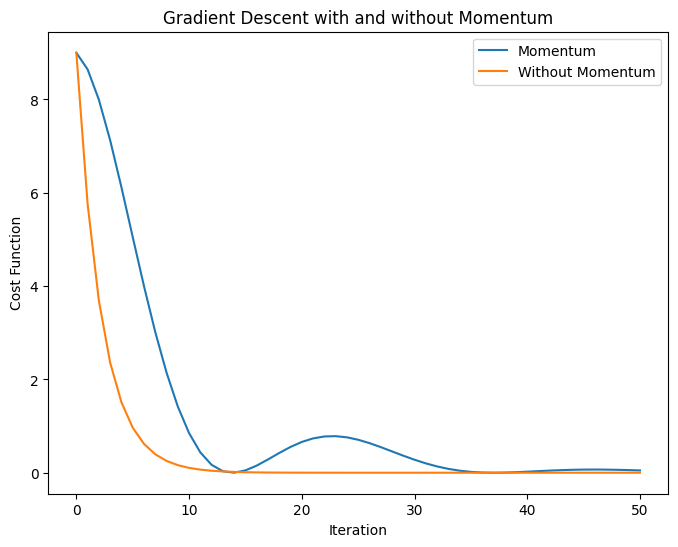

In [71]:
def cost_function(x):
    return x**2

def gradient(x):
    return 2 * x

def gradient_descent_with_momentum(initial_x, learning_rate, beta, num_iterations):
    x = initial_x
    v = 0  # Initial momentum term

    trajectory = [x]

    for _ in range(num_iterations):
        grad = gradient(x)
        v = beta * v + (1 - beta) * grad
        x = x - learning_rate * v
        trajectory.append(x)

    return np.array(trajectory)

# Parameters
initial_x = 3.0
learning_rate = 0.1
beta = 0.9
num_iterations = 50

# Run gradient descent with momentum
trajectory_with_momentum = gradient_descent_with_momentum(initial_x, learning_rate, beta, num_iterations)

# Run standard gradient descent for comparison
trajectory_without_momentum = gradient_descent_with_momentum(initial_x, learning_rate, 0.0, num_iterations)

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(np.arange(num_iterations + 1), cost_function(trajectory_with_momentum), label='Momentum')
plt.plot(np.arange(num_iterations + 1), cost_function(trajectory_without_momentum), label='Without Momentum')
plt.title('Gradient Descent with and without Momentum')
plt.xlabel('Iteration')
plt.ylabel('Cost Function')
plt.legend()
plt.show()

# RMSProp

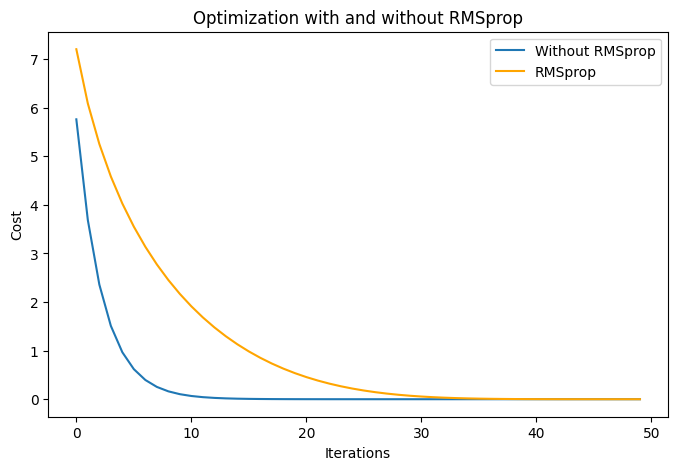

In [72]:
# RMSprop optimization
def rmsprop(theta, alpha, beta, epsilon, num_iterations):
    losses = []
    squared_gradients = 0
    for _ in range(num_iterations):
        gradient = 2 * theta  # Gradient of the quadratic cost function
        squared_gradients = beta * squared_gradients + (1 - beta) * gradient ** 2
        theta = theta - alpha / (np.sqrt(squared_gradients) + epsilon) * gradient
        losses.append(quadratic_cost(theta))
    return losses

# Run gradient descent without RMSprop
theta_no_rmsprop = gradient_descent(theta_initial, alpha, num_iterations)

# Run RMSprop optimization
theta_rmsprop = rmsprop(theta_initial, alpha, beta, epsilon, num_iterations)

# Plot the results
plt.figure(figsize=(8, 5))

plt.plot(theta_no_rmsprop, label='Without RMSprop')
plt.plot(theta_rmsprop, label='RMSprop', color='orange')
plt.title('Optimization with and without RMSprop')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()

plt.show()

# AdaGrad

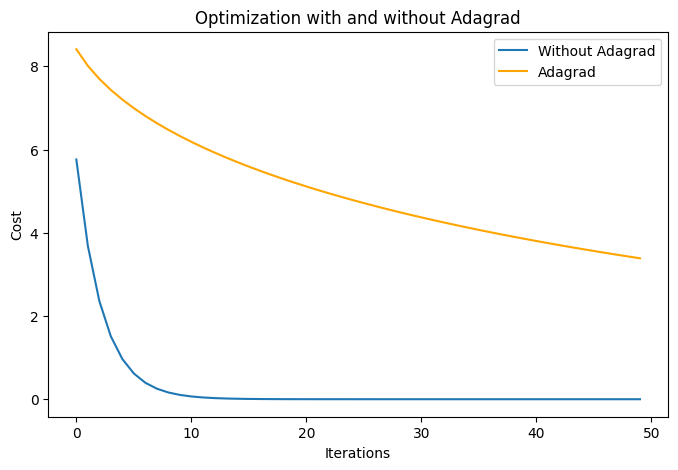

In [73]:
# Run gradient descent without Adagrad
theta_no_adagrad = gradient_descent(theta_initial, alpha, num_iterations)

# Run Adagrad optimization
theta_adagrad = adagrad(theta_initial, alpha, epsilon, num_iterations)

# Plot the results
plt.figure(figsize=(8, 5))

plt.plot(theta_no_adagrad, label='Without Adagrad')
plt.plot(theta_adagrad, label='Adagrad', color='orange')
plt.title('Optimization with and without Adagrad')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()

plt.show()